In [1]:
import tensorflow as tf

In [2]:
# Load the MNIST dataset
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data:


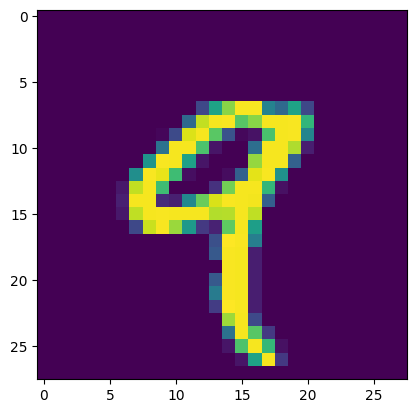

Label of this image is 9


In [3]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [4]:
import numpy as np
xtrain = np.reshape(xtrain,(-1,28,28,1))
xtest = np.reshape(xtest,(-1,28,28,1))

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [7]:
from keras.models import Sequential
model=Sequential()

In [8]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 179s 287ms/step - accuracy: 0.9020 - loss: 0.3126 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 168s 279ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 170s 283ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9916 - val_loss: 0.0259
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 169s 281ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9922 - val_loss: 0.0242
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 205s 287ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9936 - val_loss: 0.0207


In [11]:
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9978 - loss: 0.0077
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9920 - loss: 0.0245


([0.008226264268159866, 0.9975333213806152],
 [0.020650364458560944, 0.9936000108718872])